<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#第一步:--批量读取数据" data-toc-modified-id="第一步:--批量读取数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>第一步:  批量读取数据</a></span><ul class="toc-item"><li><span><a href="#实践:-用循环批量去除掉所有表格中的没有用的第一列" data-toc-modified-id="实践:-用循环批量去除掉所有表格中的没有用的第一列-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>实践: 用循环批量去除掉所有表格中的没有用的第一列</a></span></li><li><span><a href="#统计每一个城市分别有多少条数据" data-toc-modified-id="统计每一个城市分别有多少条数据-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>统计每一个城市分别有多少条数据</a></span></li><li><span><a href="#对DataFrame再做一个过滤" data-toc-modified-id="对DataFrame再做一个过滤-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>对DataFrame再做一个过滤</a></span></li><li><span><a href="#批量统计一下这些表格中的空值情况" data-toc-modified-id="批量统计一下这些表格中的空值情况-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>批量统计一下这些表格中的空值情况</a></span></li><li><span><a href="#城市这一列必须要先进行填充" data-toc-modified-id="城市这一列必须要先进行填充-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>城市这一列必须要先进行填充</a></span></li></ul></li><li><span><a href="#第二个:-合并数据" data-toc-modified-id="第二个:-合并数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>第二个: 合并数据</a></span><ul class="toc-item"><li><span><a href="#发现有一些相同的字段用的是不同的名称" data-toc-modified-id="发现有一些相同的字段用的是不同的名称-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>发现有一些相同的字段用的是不同的名称</a></span></li><li><span><a href="#重新进行合并" data-toc-modified-id="重新进行合并-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>重新进行合并</a></span></li></ul></li><li><span><a href="#简单了解数据" data-toc-modified-id="简单了解数据-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>简单了解数据</a></span><ul class="toc-item"><li><span><a href="#进一步处理数据" data-toc-modified-id="进一步处理数据-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>进一步处理数据</a></span></li><li><span><a href="#处理薪资列,拆分成最大值和最小值" data-toc-modified-id="处理薪资列,拆分成最大值和最小值-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>处理薪资列,拆分成最大值和最小值</a></span></li><li><span><a href="#公司级别拆分成三列" data-toc-modified-id="公司级别拆分成三列-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>公司级别拆分成三列</a></span></li></ul></li><li><span><a href="#数据统计分析" data-toc-modified-id="数据统计分析-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>数据统计分析</a></span><ul class="toc-item"><li><span><a href="#看一下数据分布情况" data-toc-modified-id="看一下数据分布情况-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>看一下数据分布情况</a></span></li><li><span><a href="#分组统计" data-toc-modified-id="分组统计-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>分组统计</a></span></li><li><span><a href="#过滤出北京薪资超过20万的岗位" data-toc-modified-id="过滤出北京薪资超过20万的岗位-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>过滤出北京薪资超过20万的岗位</a></span></li></ul></li><li><span><a href="#使用pyecharts绘制地图" data-toc-modified-id="使用pyecharts绘制地图-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>使用pyecharts绘制地图</a></span><ul class="toc-item"><li><span><a href="#绘制一个柱状图" data-toc-modified-id="绘制一个柱状图-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>绘制一个柱状图</a></span></li><li><span><a href="#绘制地理图" data-toc-modified-id="绘制地理图-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>绘制地理图</a></span></li></ul></li></ul></div>

# 拉勾网数据清洗及统计分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/mac/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## 第一步:  批量读取数据

面临的是一个和之前不一样的情况.

有好多个文件要操作.



1. 查看数据的样子
2. 批量读取文件, os模块,获取文件列表
3. for循环依次读取,
4. 当你有一大堆的DataFrame想要保存的时候,可以用容器型数据.这里我们用字典保存数据.

In [2]:
# 数据用逗号进行分割
import os

In [4]:
os.listdir('lagou_copy')   # 查看文件列表

['zhengzhou.csv',
 'xiamen.csv',
 '修改记录.txt',
 'foshan.csv',
 '.DS_Store',
 'xian.csv',
 'changsha.csv',
 'wuhan.csv',
 'shenzhen.csv',
 'hangzhou.csv',
 'suzhou.csv',
 'guangzhou.csv',
 'chongqing.csv',
 'chengdu.csv',
 'shanghai.csv',
 'beijing.csv',
 'nanjing.csv',
 'tianjin.csv']

In [10]:
# 把想要读取的文件名称保存下来
file_name_list = []
# 批量读取
for filename in os.listdir('lagou_copy'):
    # 过滤条件, 只要csv文件
    if filename[-4:] == '.csv':
#         print(filename)
        file_name_list.append(filename)

In [11]:
file_name_list

['zhengzhou.csv',
 'xiamen.csv',
 'foshan.csv',
 'xian.csv',
 'changsha.csv',
 'wuhan.csv',
 'shenzhen.csv',
 'hangzhou.csv',
 'suzhou.csv',
 'guangzhou.csv',
 'chongqing.csv',
 'chengdu.csv',
 'shanghai.csv',
 'beijing.csv',
 'nanjing.csv',
 'tianjin.csv']

In [14]:
s = 'nanjing.csv'
s

'nanjing.csv'

In [17]:
s[:-4]

'nanjing'

In [18]:
s.replace('.csv','')

'nanjing'

In [19]:
# 批量读取
# 存到字典里面
lagou_dict = {}
for filename in file_name_list:
    key = filename[:-4]
    # 读取数据
    value = pd.read_csv('lagou_copy/'+filename)
    # 在字典里面添加一个键值对
    lagou_dict[key] = value

In [21]:
lagou_dict.keys()

dict_keys(['zhengzhou', 'xiamen', 'foshan', 'xian', 'changsha', 'wuhan', 'shenzhen', 'hangzhou', 'suzhou', 'guangzhou', 'chongqing', 'chengdu', 'shanghai', 'beijing', 'nanjing', 'tianjin'])

In [23]:
lagou_dict['suzhou'] # 提取哪个城市就用哪个城市名称

,Unnamed: 0,标题,城市,公司地点,薪资待遇,工位要求,公司名称,公司级别,岗位技能,公司短评
0,0,数据分析师,苏州,[独墅湖],12k-24k,12k-24k 经验1-3年 / 硕士,苏州瑞鹏信息技术有限公司,"移动互联网,数据服务 / 不需要融资 / 50-150人",大数据 SPSS 数据分析 SQL,“高速发展公司 大牛团队”
1,1,数据分析师,苏州,[独墅湖],15k-25k,15k-25k 经验3-5年 / 本科,瑞小云,移动互联网 / 不需要融资 / 15-50人,大数据 数据分析 SQL 数据库 可视化,“五险一金、绩效奖金、年终多薪、年度旅游。”
2,2,数据分析师,苏州,[工业园区],7k-9k,7k-9k 经验1-3年 / 本科,东莞美宜佳,其他 / 不需要融资 / 500-2000人,新零售,“管理人性化 福利待遇优”
3,3,数据分析工程师,苏州,[工业园区],10k-13k,10k-13k 经验1-3年 / 本科,微创软件,"企业服务,移动互联网 / 不需要融资 / 2000人以上",BI 可视化 数据分析,“大平台 人工智能”
4,4,高级数据分析师,苏州,[独墅湖],15k-20k,15k-20k 经验3-5年 / 本科,瑞翼,移动互联网 / 不需要融资 / 150-500人,移动互联网 大数据 数据分析 数据运营 商业,“五险一金；年终奖金；绩效奖金”
5,5,数据产品经理（数据分析方向）,苏州,[娄葑],10k-15k,10k-15k 经验1-3年 / 本科,智慧芽,移动互联网 / D轮及以上 / 150-500人,数据分析,“行业领头者 全球化业务布局”
6,6,BI数据分析师,苏州,[吴江区],10k-20k,10k-20k 经验不限 / 本科,飞旭电子,企业服务 / 未融资 / 2000人以上,SQLServer 数据分析 数据挖掘 ETL,“法资外企 出国机会 领导Nice”
7,7,数据运营/数据分析师,苏州,[独墅湖],10k-20k,10k-20k 经验3-5年 / 本科,瑞小云,移动互联网 / 不需要融资 / 15-50人,大数据 互联网金融 运营 数据分析 产品运营 效果跟踪,“五险一金、绩效奖金、年终多薪、年度旅游。”


### 实践: 用循环批量去除掉所有表格中的没有用的第一列

In [25]:
# for循环对字典进行遍历
for key in lagou_dict:
    print(key)
    lagou_dict[key].drop(columns='Unnamed: 0',inplace=True)

zhengzhou
xiamen
foshan
xian
changsha
wuhan
shenzhen
hangzhou
suzhou
guangzhou
chongqing
chengdu
shanghai
beijing
nanjing
tianjin


In [29]:
lagou_dict['zhengzhou']

,标题,城市,公司地点,薪资待遇,工位要求,公司名称,公司级别,岗位技能,公司短评
0,数据分析,郑州,[北林路],6k-8k,6k-8k 经验1-3年 / 大专,卓影科技,其他 / 上市公司 / 150-500人,数据运营,“五险一金、带薪年假、节日福利、加班补助”
1,数据分析（互联网运营中心）,郑州,[高新区],12k-24k,12k-24k 经验3-5年 / 本科,中移在线服务有限公司,移动互联网 / 不需要融资 / 2000人以上,教育 数据挖掘 数据分析,"“领导好,扁平化,福利多,空间大”"
2,商业化-数据分析经理,郑州,[金水区],15k-25k,15k-25k 经验3-5年 / 本科,字节跳动,文娱丨内容 / C轮 / 2000人以上,数据分析,“六险一金，餐补，租房补贴，带薪休假”
3,数据分析师,郑州,[北林路],4k-8k,4k-8k 经验1-3年 / 本科,戎易商智（北京）科技有限公司,"移动互联网,数据服务 / 未融资 / 15-50人",通信/网络设备 移动互联网 SPSS 数据分析,“周末双休，五险一金，带薪年假”
4,大数据分析师,郑州,[管城回族区],30k-40k,30k-40k 经验5-10年 / 不限,宇通客车,企业服务 / 上市公司 / 2000人以上,BI SPSS 数据分析,“高薪、福利待遇、假期多”
5,金融数据分析师,郑州,[金水区],6k-10k,6k-10k 经验不限 / 大专,河南千山教育科技有限公司,金融 / 未融资 / 50-150人,证券 股票 证券分析,“薪资待遇：8K~10K 双休”
6,大数据分析开发工程师助理/实习生,郑州,[经开区],4k-6k,4k-6k 经验不限 / 大专,缓冲网络科技,"移动互联网,人工智能 / 上市公司 / 500-2000人",工具软件 移动互联网 数据挖掘 数据架构 数据仓库 算法,“包住，发展前景大”
7,大数据分析师,郑州,[高新区],15k-25k,15k-25k 经验3-5年 / 本科,中移在线服务有限公司,移动互联网 / 不需要融资 / 2000人以上,数据分析 SQL,“海量数据 优质平台 发展空间大”
8,政企大数据分析师,郑州,[高新区],10k-20k,10k-20k 经验应届毕业生 / 本科,中移在线服务有限公司,移动互联网 / 不需要融资 / 2000人以上,分类信息 大数据 数据挖掘 数据架构 数据仓库 数据分析,“六险两金、扁平化管理”


### 统计每一个城市分别有多少条数据

In [32]:
# 将结果存到一个Series里面
# 建立一个空的
city_num = pd.Series()
# 对每个DataFrame进行遍历
for key in lagou_dict:
    # 得到DataFrame行数
    value = lagou_dict[key].shape[0]
    # 添加进Series里面去
    city_num[key] = value
city_num

zhengzhou      9
xiamen        14
foshan        10
xian          12
changsha      16
wuhan         45
shenzhen     262
hangzhou     145
suzhou         8
guangzhou    177
chongqing      8
chengdu       46
shanghai     435
beijing      450
nanjing       30
tianjin        7
dtype: int64

In [33]:
# 排序
city_num.sort_values(ascending=False)

beijing      450
shanghai     435
shenzhen     262
guangzhou    177
hangzhou     145
chengdu       46
wuhan         45
nanjing       30
changsha      16
xiamen        14
xian          12
foshan        10
zhengzhou      9
chongqing      8
suzhou         8
tianjin        7
dtype: int64

### 对DataFrame再做一个过滤

删掉少于30条数据的城市

In [34]:
lagou_dict.keys()

dict_keys(['zhengzhou', 'xiamen', 'foshan', 'xian', 'changsha', 'wuhan', 'shenzhen', 'hangzhou', 'suzhou', 'guangzhou', 'chongqing', 'chengdu', 'shanghai', 'beijing', 'nanjing', 'tianjin'])

In [35]:
# 我们不直接在原来的字典中删除

# 而是弄一个新的,然后把超过30条的放进新的里面去
# 建立新字典
lagou_dict_30 = {}
for city in lagou_dict:
    # 判断这个DataFrame有没有超过30条
    if lagou_dict[city].shape[0] >= 30:
        # 如果满足条件,就添加到新字典里面去
        lagou_dict_30[city] = lagou_dict[city]

In [36]:
lagou_dict_30.keys()

dict_keys(['wuhan', 'shenzhen', 'hangzhou', 'guangzhou', 'chengdu', 'shanghai', 'beijing', 'nanjing'])

### 批量统计一下这些表格中的空值情况 

In [38]:
for city in lagou_dict_30:
    print(city)
    print(lagou_dict_30[city].isnull().sum())
    print('-'*30)

wuhan
标题      0
城市      3
地点      1
薪资待遇    3
岗位要求    0
名称      0
级别      0
岗位技能    0
短评      0
dtype: int64
------------------------------
shenzhen
标题      0
城市      0
公司地点    0
薪资待遇    0
工位要求    0
公司名称    0
公司级别    0
岗位技能    0
公司短评    0
dtype: int64
------------------------------
hangzhou
标题      0
城市      0
公司地点    0
薪资待遇    0
工位要求    0
公司名称    0
公司级别    0
岗位技能    0
公司短评    0
dtype: int64
------------------------------
guangzhou
标题      0
城市      0
公司地点    0
薪资待遇    0
工位要求    0
公司名称    0
公司级别    0
岗位技能    0
公司短评    0
dtype: int64
------------------------------
chengdu
标题      0
城市      0
公司地点    0
薪资待遇    0
工位要求    0
公司名称    0
公司级别    0
岗位技能    1
公司短评    0
dtype: int64
------------------------------
shanghai
标题      0
城市      0
公司地点    0
薪资待遇    0
工位要求    0
公司名称    0
公司级别    0
岗位技能    1
公司短评    0
dtype: int64
------------------------------
beijing
标题      0
公司地点    0
薪资待遇    0
工位要求    0
公司名称    0
公司级别    0
岗位技能    1
公司短评    0
dtype: int64
------------------------------
nanjing
标题   

### 城市这一列必须要先进行填充

In [42]:
# 众数
lagou_dict_30['wuhan'].城市.mode()[0]

'武汉'

In [43]:
# 填充武汉
lagou_dict_30['wuhan'].城市.fillna(lagou_dict_30['wuhan'].城市.mode()[0])

0     武汉
1     武汉
2     武汉
3     武汉
4     武汉
5     武汉
6     武汉
7     武汉
8     武汉
9     武汉
10    武汉
11    武汉
12    武汉
13    武汉
14    武汉
15    武汉
16    武汉
17    武汉
18    武汉
19    武汉
20    武汉
21    武汉
22    武汉
23    武汉
24    武汉
25    武汉
26    武汉
27    武汉
28    武汉
29    武汉
30    武汉
31    武汉
32    武汉
33    武汉
34    武汉
35    武汉
36    武汉
37    武汉
38    武汉
39    武汉
40    武汉
41    武汉
42    武汉
43    武汉
44    武汉
Name: 城市, dtype: object

In [48]:
lagou_dict_30['beijing'].get('城市',-1)

-1

In [49]:
test = lagou_dict_30['beijing']

In [52]:
test.get('城市',-1)

-1

In [99]:
len(lagou_dict_30['beijing'].get('城市',pd.Series()))

0

In [104]:
# 判断DataFrame有没有城市这一列
lagou_dict_30['wuhan'].get('城市',[-1,-1])[0] == -1

'武汉'

In [108]:
'城市' in lagou_dict_30['wuhan'].columns

True

In [111]:
lagou_dict_30['wuhan'].columns

Index(['标题', '城市', '地点', '薪资待遇', '岗位要求', '名称', '级别', '岗位技能', '短评'], dtype='object')

In [109]:
6 in [6,7,8]

True

In [110]:
9 in [6,7,8]

False

In [116]:
# 对所有城市都填充城市众数
for key in lagou_dict_30:
    # 判断这个城市有没有这一列
    if '城市' in lagou_dict_30[key].columns: # 有这一列
        # 填充
        lagou_dict_30[key].城市.fillna(lagou_dict_30[key].城市.mode()[0],inplace=True)


In [117]:
for city in lagou_dict_30:
    print(city)
    print(lagou_dict_30[city].isnull().sum())
    print('-'*30)

wuhan
标题      0
城市      0
地点      1
薪资待遇    3
岗位要求    0
名称      0
级别      0
岗位技能    0
短评      0
dtype: int64
------------------------------
shenzhen
标题      0
城市      0
公司地点    0
薪资待遇    0
工位要求    0
公司名称    0
公司级别    0
岗位技能    0
公司短评    0
dtype: int64
------------------------------
hangzhou
标题      0
城市      0
公司地点    0
薪资待遇    0
工位要求    0
公司名称    0
公司级别    0
岗位技能    0
公司短评    0
dtype: int64
------------------------------
guangzhou
标题      0
城市      0
公司地点    0
薪资待遇    0
工位要求    0
公司名称    0
公司级别    0
岗位技能    0
公司短评    0
dtype: int64
------------------------------
chengdu
标题      0
城市      0
公司地点    0
薪资待遇    0
工位要求    0
公司名称    0
公司级别    0
岗位技能    1
公司短评    0
dtype: int64
------------------------------
shanghai
标题      0
城市      0
公司地点    0
薪资待遇    0
工位要求    0
公司名称    0
公司级别    0
岗位技能    1
公司短评    0
dtype: int64
------------------------------
beijing
标题      0
公司地点    0
薪资待遇    0
工位要求    0
公司名称    0
公司级别    0
岗位技能    1
公司短评    0
dtype: int64
------------------------------
nanjing
标题   

## 第二个: 合并数据

In [125]:
# 三分钟时间自己试一下合并数据

# 定义一个空的DataFrame, 把所有的DataFrame都合并到这里面来
df = pd.DataFrame()


In [126]:
# 对字典进行遍历
for key in lagou_dict_30:
    
    df = df.append(lagou_dict_30[key] ,  ignore_index=True,sort=False) # 忽略原索引

In [127]:
df

,标题,城市,地点,薪资待遇,岗位要求,名称,级别,岗位技能,短评,公司地点,工位要求,公司名称,公司级别,公司短评
0,高级数据分析（对标985/211）,武汉,[白沙洲],8k-15k,8k-15k 经验1-3年 / 本科,易佰网络科技,"电商,移动互联网 / B轮 / 2000人以上",电商 算法 数据挖掘 数据分析 数据处理,“五险一金/节日福利/专业培训/全勤奖”,NaN,NaN,NaN,NaN,NaN
1,数据分析师,武汉,[洪山区],10k-20k,10k-20k 经验不限 / 不限,悦然心动,"社交,游戏 / 上市公司 / 150-500人",可视化 数据库 数据分析,“带薪出国游；千万级用户”,NaN,NaN,NaN,NaN,NaN
2,数据分析师,武汉,[东湖新技术…],10k-15k,10k-15k 经验5-10年 / 本科,盛天网络,"游戏,文娱丨内容 / 上市公司 / 500-2000人",数据分析 数据运营,“福利好 发展快”,NaN,NaN,NaN,NaN,NaN
3,数据分析师,武汉,[洪山区],20k-40k,20k-40k 经验3-5年 / 本科,字节跳动,文娱丨内容 / C轮 / 2000人以上,数据分析,“弹性工作，免费三餐，晋升空间，团队氛围好”,NaN,NaN,NaN,NaN,NaN
4,数据分析,武汉,[东湖新技术…],5k-10k,5k-10k 经验不限 / 大专,诸葛io,"企业服务,数据服务 / A轮 / 50-150人",大数据 企业服务 SQL,“五险一金 带薪年假 定期团建”,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,银行数据分析实习生,南京,NaN,5k-7k,NaN,NaN,NaN,Oracle 数据仓库 数据挖掘,NaN,[雨花台区],5k-7k 经验1年以下 / 本科,江苏谷科软件有限公司,"信息安全,金融 / 未融资 / 150-500人",“六险一金、年终奖、一年两次调薪机会”
1586,商业数据分析师,南京,NaN,10k-15k,NaN,NaN,NaN,数据分析,NaN,[宁南],10k-15k 经验3-5年 / 不限,讯实科技,数据服务 / B轮 / 15-50人,“五险一金 双休”
1587,BI数据分析产品经理,南京,NaN,10k-15k,NaN,NaN,NaN,新零售 BI 数据 数据分析,NaN,[鼓楼区],10k-15k 经验5-10年 / 本科,五星电器,"电商,消费生活 / 不需要融资 / 2000人以上",“五险一金、节假日福利”
1588,大数据分析开发工程师,南京,NaN,8k-15k,NaN,NaN,NaN,大数据 数据挖掘,NaN,[山西路],8k-15k 经验1-3年 / 本科,南京邮数通,"移动互联网,信息安全 / 不需要融资 / 15-50人","“项目奖金,带薪休年假,五险一金”"


### 发现有一些相同的字段用的是不同的名称

所以需要进一步处理,首先找出哪些字段存在问题

In [128]:
# 把所有表格列名打印出来观察
for key in lagou_dict_30:
    print(key)
    print(lagou_dict_30[key].columns)
    print('-'*30)

wuhan
Index(['标题', '城市', '地点', '薪资待遇', '岗位要求', '名称', '级别', '岗位技能', '短评'], dtype='object')
------------------------------
shenzhen
Index(['标题', '城市', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dtype='object')
------------------------------
hangzhou
Index(['标题', '城市', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dtype='object')
------------------------------
guangzhou
Index(['标题', '城市', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dtype='object')
------------------------------
chengdu
Index(['标题', '城市', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dtype='object')
------------------------------
shanghai
Index(['标题', '城市', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dtype='object')
------------------------------
beijing
Index(['标题', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dtype='object')
------------------------------
nanjing
Index(['标题', '城市', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dtype='obj

In [129]:
d = {'地点':'公司地点','岗位要求':'工位要求','名称':'公司名称',
    '级别':'公司级别','短评':'公司短评'}

# 把武汉数据里面不一样的列名改成统一的
lagou_dict_30['wuhan'].rename(columns=d,inplace=True)

In [130]:
# 把所有表格列名打印出来观察
for key in lagou_dict_30:
    print(key)
    print(lagou_dict_30[key].columns)
    print('-'*30)

wuhan
Index(['标题', '城市', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dtype='object')
------------------------------
shenzhen
Index(['标题', '城市', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dtype='object')
------------------------------
hangzhou
Index(['标题', '城市', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dtype='object')
------------------------------
guangzhou
Index(['标题', '城市', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dtype='object')
------------------------------
chengdu
Index(['标题', '城市', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dtype='object')
------------------------------
shanghai
Index(['标题', '城市', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dtype='object')
------------------------------
beijing
Index(['标题', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dtype='object')
------------------------------
nanjing
Index(['标题', '城市', '公司地点', '薪资待遇', '工位要求', '公司名称', '公司级别', '岗位技能', '公司短评'], dt

### 重新进行合并

In [187]:
# 三分钟时间自己试一下合并数据

# 定义一个空的DataFrame, 把所有的DataFrame都合并到这里面来
df = pd.DataFrame()
# 对字典进行遍历
for key in lagou_dict_30:
    
    df = df.append(lagou_dict_30[key] ,  ignore_index=True,sort=False) # 忽略原索引


In [188]:
df

,标题,城市,公司地点,薪资待遇,工位要求,公司名称,公司级别,岗位技能,公司短评
0,高级数据分析（对标985/211）,武汉,[白沙洲],8k-15k,8k-15k 经验1-3年 / 本科,易佰网络科技,"电商,移动互联网 / B轮 / 2000人以上",电商 算法 数据挖掘 数据分析 数据处理,“五险一金/节日福利/专业培训/全勤奖”
1,数据分析师,武汉,[洪山区],10k-20k,10k-20k 经验不限 / 不限,悦然心动,"社交,游戏 / 上市公司 / 150-500人",可视化 数据库 数据分析,“带薪出国游；千万级用户”
2,数据分析师,武汉,[东湖新技术…],10k-15k,10k-15k 经验5-10年 / 本科,盛天网络,"游戏,文娱丨内容 / 上市公司 / 500-2000人",数据分析 数据运营,“福利好 发展快”
3,数据分析师,武汉,[洪山区],20k-40k,20k-40k 经验3-5年 / 本科,字节跳动,文娱丨内容 / C轮 / 2000人以上,数据分析,“弹性工作，免费三餐，晋升空间，团队氛围好”
4,数据分析,武汉,[东湖新技术…],5k-10k,5k-10k 经验不限 / 大专,诸葛io,"企业服务,数据服务 / A轮 / 50-150人",大数据 企业服务 SQL,“五险一金 带薪年假 定期团建”
...,...,...,...,...,...,...,...,...,...
1585,银行数据分析实习生,南京,[雨花台区],5k-7k,5k-7k 经验1年以下 / 本科,江苏谷科软件有限公司,"信息安全,金融 / 未融资 / 150-500人",Oracle 数据仓库 数据挖掘,“六险一金、年终奖、一年两次调薪机会”
1586,商业数据分析师,南京,[宁南],10k-15k,10k-15k 经验3-5年 / 不限,讯实科技,数据服务 / B轮 / 15-50人,数据分析,“五险一金 双休”
1587,BI数据分析产品经理,南京,[鼓楼区],10k-15k,10k-15k 经验5-10年 / 本科,五星电器,"电商,消费生活 / 不需要融资 / 2000人以上",新零售 BI 数据 数据分析,“五险一金、节假日福利”
1588,大数据分析开发工程师,南京,[山西路],8k-15k,8k-15k 经验1-3年 / 本科,南京邮数通,"移动互联网,信息安全 / 不需要融资 / 15-50人",大数据 数据挖掘,"“项目奖金,带薪休年假,五险一金”"


## 简单了解数据

In [189]:
df.shape

(1590, 9)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 9 columns):
标题      1590 non-null object
城市      1140 non-null object
公司地点    1588 non-null object
薪资待遇    1585 non-null object
工位要求    1590 non-null object
公司名称    1589 non-null object
公司级别    1590 non-null object
岗位技能    1587 non-null object
公司短评    1590 non-null object
dtypes: object(9)
memory usage: 111.9+ KB


In [191]:
# 把城市中空值数据过滤出来
df[df.城市.isnull()]

,标题,城市,公司地点,薪资待遇,工位要求,公司名称,公司级别,岗位技能,公司短评
1110,数据分析师,NaN,[东城区],15k-25k,15k-25k 经验3-5年 / 本科,玩吧,社交 / B轮 / 150-500人,数据分析 SPSS SQL,"“七险一金,免费午餐,弹性不打卡,季度旅游”"
1111,数据分析师,NaN,[大望路],10k-20k,10k-20k 经验不限 / 本科,和信集团,金融 / 不需要融资 / 2000人以上,数据分析,“五险一金、周末双休”
1112,数据分析师,NaN,[望京],15k-25k,15k-25k 经验3-5年 / 本科,水滴互助,"移动互联网,医疗丨健康 / B轮 / 500-2000人",数据分析 MySQL Hive,"“年底双薪,股票期权,扁平管理,晋升快”"
1113,数据分析,NaN,[西北旺],15k-30k,15k-30k 经验3-5年 / 本科,易企秀,移动互联网 / B轮 / 150-500人,数据运营 SPSS SQL,“七险一金、零食水果、带薪年假、年度旅游等”
1114,数据分析师,NaN,[东城区],15k-20k,15k-20k 经验3-5年 / 大专,齐聚科技（原呱呱视频）,"移动互联网,游戏 / C轮 / 150-500人",游戏 社交 SQL 数据分析 商业,"“五险一金,弹性工作,餐补年终奖,节日福利”"
...,...,...,...,...,...,...,...,...,...
1555,课程数据分析专员,NaN,[朝阳区],6k-9k,6k-9k 经验1年以下 / 本科,笔记侠,移动互联网 / A轮 / 15-50人,互联网金融 教育 运营 数据分析 效果跟踪,“公司资源，发展前景，加班少”
1556,数据分析师（数据产品经理）,NaN,[北京大学],25k-35k,25k-35k 经验3-5年 / 本科,新浪微博,文娱丨内容 / 上市公司 / 2000人以上,大数据 数据挖掘 数据分析,"“带薪年假,大平台福利,六险一金,出境游”"
1557,数据分析岗,NaN,[广内大街],8k-15k,8k-15k 经验3-5年 / 本科,国家电网全资子公司北京汇通金财,"电商,金融 / 不需要融资 / 500-2000人",数据分析,“福利待遇 发展前景”
1558,产品数据分析专员,NaN,[清河],8k-15k,8k-15k 经验1-3年 / 本科,小米,硬件 / D轮及以上 / 2000人以上,其他,“大牛团队”


In [192]:
# 把城市中的空值填充成北京
df.城市.fillna('北京',inplace=True)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 9 columns):
标题      1590 non-null object
城市      1590 non-null object
公司地点    1588 non-null object
薪资待遇    1585 non-null object
工位要求    1590 non-null object
公司名称    1589 non-null object
公司级别    1590 non-null object
岗位技能    1587 non-null object
公司短评    1590 non-null object
dtypes: object(9)
memory usage: 111.9+ KB


In [194]:
# 把所有含有空值的都提取出来
df.isnull().sum(axis=1) # 有空值的行大于0

0       0
1       0
2       0
3       0
4       0
       ..
1585    0
1586    0
1587    0
1588    0
1589    0
Length: 1590, dtype: int64

In [195]:
df.isnull().sum(axis=1) > 0

0       False
1       False
2       False
3       False
4       False
        ...  
1585    False
1586    False
1587    False
1588    False
1589    False
Length: 1590, dtype: bool

In [196]:
# 提取所有空值
df[df.isnull().sum(axis=1) > 0]

,标题,城市,公司地点,薪资待遇,工位要求,公司名称,公司级别,岗位技能,公司短评
20,高级数据分析师,武汉,[流芳],NaN,12k-20k 经验5-10年 / 本科,优品财富管理有限公司,金融 / 未融资 / 500-2000人,移动互联网 SQLServer 数据仓库,"“BAT团队,团队氛围好,晋升空间大”"
23,数据分析（校招/实习）,武汉,[东湖新技术…],NaN,4k-8k 经验应届毕业生 / 本科,微派,社交 / B轮 / 50-150人,数据分析,"“发展空间大,大牛带”"
27,数据分析师,武汉,[洪山区],NaN,5k-10k 经验1-3年 / 本科,掌游科技,"移动互联网,游戏 / 上市公司 / 150-500人",数据分析 数据运营,"“流水过亿,扁平管理,专业团队,定期培训”"
40,数据分析算法工程师,武汉,NaN,10k-20k,10k-20k 经验3-5年 / 硕士,三藏科技,软件开发 / 未融资 / 15-50人,建模 机器学习 算法,“办公环境优、资深大佬指导、领导超Nice”
638,数据分析,成都,[武侯区],12k-20k,12k-20k 经验不限 / 硕士,XGATE讯格得,"移动互联网,企业服务 / 不需要融资 / 50-150人",NaN,“五险一金、国定假期、每周水果、休息室”
818,数据分析,上海,[虹桥],6k-8k,6k-8k 经验不限 / 不限,旺旺集团,"电商,移动互联网 / 上市公司 / 2000人以上",NaN,“有班车、食堂；零食福利”
1438,数据分析,北京,[朝外],6k-12k,6k-12k 经验不限 / 大专,北京盛业恒泰投资有限公司,"移动互联网,金融 / 不需要融资 / 150-500人",NaN,“双休 五险一金 朝九晚五”
1569,数据分析专员,南京,[小行],NaN,7k-10k 经验1-3年 / 本科,vivo,硬件 / 未融资 / 2000人以上,数据分析,"“弹性工作,试用期全薪，丰富年终奖”"
1572,数据分析师,南京,[铁心桥],NaN,6k-8k 经验应届毕业生 / 本科,江苏谷科软件有限公司,"信息安全,金融 / 未融资 / 150-500人",数据分析 SQL 数据库,“六险一金、年底双薪、带薪年假、高温补贴”
1580,数据分析（python）实习生（南京）,南京,[珠江路],4k-6k,4k-6k 经验应届毕业生 / 硕士,NaN,教育 / 未融资 / 50-150人,大数据,“扁平管理；弹性工作”


In [197]:
df.describe()

,标题,城市,公司地点,薪资待遇,工位要求,公司名称,公司级别,岗位技能,公司短评
count,1590,1590,1588,1585,1590,1589,1590,1587,1590
unique,599,8,307,148,452,850,520,844,1281
top,数据分析师,北京,[朝阳区],15k-25k,15k-30k 经验3-5年 / 本科,字节跳动,文娱丨内容 / C轮 / 2000人以上,数据分析,“六险一金，弹性工作，免费三餐，租房补贴”
freq,452,450,77,174,102,53,53,226,21


### 进一步处理数据

In [198]:
# 把公司地点中的括号去掉
# 3分钟时间
df.公司地点.str.replace('[','').str.replace(']','')

0          白沙洲
1          洪山区
2       东湖新技术…
3          洪山区
4       东湖新技术…
         ...  
1585      雨花台区
1586        宁南
1587       鼓楼区
1588       山西路
1589      雨花台区
Name: 公司地点, Length: 1590, dtype: object

In [199]:
df.公司地点 = df.公司地点.str.replace('[','').str.replace(']','')

In [201]:
df.工位要求.iloc[1570:]

1570      6k-12k 经验1-3年 / 本科
1571      7k-10k 经验1-3年 / 本科
1572      6k-8k 经验应届毕业生 / 本科
1573     12k-20k 经验3-5年 / 本科
1574      8k-10k 经验1-3年 / 本科
1575      7k-10k 经验1-3年 / 本科
1576             经验1-3年 / 本科
1577    25k-50k 经验5-10年 / 本科
1578    15k-25k 经验5-10年 / 本科
1579     10k-15k 经验3-5年 / 本科
1580      4k-6k 经验应届毕业生 / 硕士
1581         4k-6k 经验不限 / 本科
1582    10k-20k 经验应届毕业生 / 本科
1583             经验1-3年 / 不限
1584       3K-5K 经验1年以下 / 大专
1585       5k-7k 经验1年以下 / 本科
1586     10k-15k 经验3-5年 / 不限
1587    10k-15k 经验5-10年 / 本科
1588      8k-15k 经验1-3年 / 本科
1589    50k-80k 经验5-10年 / 本科
Name: 工位要求, dtype: object

In [206]:
df.iloc[1570:]

,标题,城市,公司地点,薪资待遇,工位要求,公司名称,公司级别,岗位技能,公司短评
1570,HB-数据分析师-南京,南京,安德门,6k-12k,6k-12k 经验1-3年 / 本科,卓尔智联集团有限公司,"移动互联网,电商 / 上市公司 / 2000人以上",电商 数据挖掘,“上市公司 500强 五险一金”
1571,数据分析工程师(帆软报表）,南京,双龙大道,7k-10k,7k-10k 经验1-3年 / 本科,鼎捷软件,其他 / 上市公司 / 2000人以上,数据分析 数据运营 数据库,“五险一金全，各项补充福利”
1572,数据分析师,南京,铁心桥,NaN,6k-8k 经验应届毕业生 / 本科,江苏谷科软件有限公司,"信息安全,金融 / 未融资 / 150-500人",数据分析 SQL 数据库,“六险一金、年底双薪、带薪年假、高温补贴”
1573,数据分析师,南京,南苑,12k-20k,12k-20k 经验3-5年 / 本科,森根科技,"信息安全,数据服务 / 不需要融资 / 150-500人",通信/网络设备 数据挖掘 算法 数据库开发,“五险一金、周末双休、包吃、绩效金”
1574,资深数据分析（风险管理方向）,南京,江东,8k-10k,8k-10k 经验1-3年 / 本科,平安普惠江苏分公司,金融 / 不需要融资 / 500-2000人,金融 风控 分析师,“薪酬福利好，发展空间大”
1575,数据分析专员,南京,小行,7k-10k,7k-10k 经验1-3年 / 本科,vivo,硬件 / 未融资 / 2000人以上,数据分析,"“弹性工作,试用期全薪，丰富年终奖”"
1576,数据分析师 (MJ000443),南京,安德门,6k-8k,经验1-3年 / 本科,SHEIN,"电商,移动互联网 / C轮 / 2000人以上",跨境电商 数据分析,“五险一金，绩效奖金，年终奖，节日福利”
1577,数据分析经理,南京,雨花台区,25k-50k,25k-50k 经验5-10年 / 本科,vivo,硬件 / 未融资 / 2000人以上,移动互联网,"“股票期权,技术驱动,千万级用户”"
1578,HB-高级数据分析师-南京,南京,安德门,15k-25k,15k-25k 经验5-10年 / 本科,卓尔智联集团有限公司,"移动互联网,电商 / 上市公司 / 2000人以上",大数据 金融 数据分析 数据挖掘 MySQL,“发展平台大 500强 上市公司”
1579,数据分析,南京,玄武区,10k-15k,10k-15k 经验3-5年 / 本科,苏宁易购,"电商,信息安全 / 上市公司 / 2000人以上",数据库 BI 可视化,“500强 平台大 发展好”


In [208]:
# 保留一个目前状态的备份
df_copy_1520 = df.copy()

In [212]:
# 想办法把部分和要求的工位要求数据提取出来
# 发现规则: 错误的没有k字母,正确的有k字母
df[~(df.工位要求.str.contains('k') | df.工位要求.str.contains('K')) ]

,标题,城市,公司地点,薪资待遇,工位要求,公司名称,公司级别,岗位技能,公司短评
30,商业化-高级数据分析师,武汉,洪山区,8k-16k,经验3-5年 / 本科,字节跳动,文娱丨内容 / C轮 / 2000人以上,项目管理,“六险一金，餐补，带薪休假，扁平管理”
1576,数据分析师 (MJ000443),南京,安德门,6k-8k,经验1-3年 / 本科,SHEIN,"电商,移动互联网 / C轮 / 2000人以上",跨境电商 数据分析,“五险一金，绩效奖金，年终奖，节日福利”
1583,推广/SEO/数据分析/运营分析/策划/创意,南京,珠江路,6k-9k,经验1-3年 / 不限,南京德胜智业,"电商,消费生活 / 未融资 / 15-50人",移动互联网 广告营销 策划 创意,“年轻、提薪快、五险一金、不加班、做五休二”


In [226]:
# 保存成t
t = df[~(df.工位要求.str.contains('k') | df.工位要求.str.contains('K')) ]

In [227]:
t

,标题,城市,公司地点,薪资待遇,工位要求,公司名称,公司级别,岗位技能,公司短评
30,商业化-高级数据分析师,武汉,洪山区,8k-16k,经验3-5年 / 本科,字节跳动,文娱丨内容 / C轮 / 2000人以上,项目管理,“六险一金，餐补，带薪休假，扁平管理”
1576,数据分析师 (MJ000443),南京,安德门,6k-8k,经验1-3年 / 本科,SHEIN,"电商,移动互联网 / C轮 / 2000人以上",跨境电商 数据分析,“五险一金，绩效奖金，年终奖，节日福利”
1583,推广/SEO/数据分析/运营分析/策划/创意,南京,珠江路,6k-9k,经验1-3年 / 不限,南京德胜智业,"电商,消费生活 / 未融资 / 15-50人",移动互联网 广告营销 策划 创意,“年轻、提薪快、五险一金、不加班、做五休二”


In [219]:
t.index

Int64Index([30, 1576, 1583], dtype='int64')

In [236]:
["8k-16k ",'6k-8k ','6k-9k '] + df.loc[t.index, '工位要求']

30      8k-16k 经验3-5年 / 本科
1576     6k-8k 经验1-3年 / 本科
1583     6k-9k 经验1-3年 / 不限
Name: 工位要求, dtype: object

In [237]:
# 用新的正确的数据,覆盖原来的三个错误数据
df.loc[t.index, '工位要求'] = ["8k-16k ",'6k-8k ','6k-9k '] + df.loc[t.index, '工位要求']

In [238]:
# 重新看一下还有没有错误的数据
df[~(df.工位要求.str.contains('k') | df.工位要求.str.contains('K')) ]

,标题,城市,公司地点,薪资待遇,工位要求,公司名称,公司级别,岗位技能,公司短评


In [239]:
# 拆分
df[['薪资','经验要求','临时','学历']] = df.工位要求.str.split(' ',expand=True)

In [240]:
df

,标题,城市,公司地点,薪资待遇,工位要求,公司名称,公司级别,岗位技能,公司短评,薪资,经验要求,临时,学历
0,高级数据分析（对标985/211）,武汉,白沙洲,8k-15k,8k-15k 经验1-3年 / 本科,易佰网络科技,"电商,移动互联网 / B轮 / 2000人以上",电商 算法 数据挖掘 数据分析 数据处理,“五险一金/节日福利/专业培训/全勤奖”,8k-15k,经验1-3年,/,本科
1,数据分析师,武汉,洪山区,10k-20k,10k-20k 经验不限 / 不限,悦然心动,"社交,游戏 / 上市公司 / 150-500人",可视化 数据库 数据分析,“带薪出国游；千万级用户”,10k-20k,经验不限,/,不限
2,数据分析师,武汉,东湖新技术…,10k-15k,10k-15k 经验5-10年 / 本科,盛天网络,"游戏,文娱丨内容 / 上市公司 / 500-2000人",数据分析 数据运营,“福利好 发展快”,10k-15k,经验5-10年,/,本科
3,数据分析师,武汉,洪山区,20k-40k,20k-40k 经验3-5年 / 本科,字节跳动,文娱丨内容 / C轮 / 2000人以上,数据分析,“弹性工作，免费三餐，晋升空间，团队氛围好”,20k-40k,经验3-5年,/,本科
4,数据分析,武汉,东湖新技术…,5k-10k,5k-10k 经验不限 / 大专,诸葛io,"企业服务,数据服务 / A轮 / 50-150人",大数据 企业服务 SQL,“五险一金 带薪年假 定期团建”,5k-10k,经验不限,/,大专
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,银行数据分析实习生,南京,雨花台区,5k-7k,5k-7k 经验1年以下 / 本科,江苏谷科软件有限公司,"信息安全,金融 / 未融资 / 150-500人",Oracle 数据仓库 数据挖掘,“六险一金、年终奖、一年两次调薪机会”,5k-7k,经验1年以下,/,本科
1586,商业数据分析师,南京,宁南,10k-15k,10k-15k 经验3-5年 / 不限,讯实科技,数据服务 / B轮 / 15-50人,数据分析,“五险一金 双休”,10k-15k,经验3-5年,/,不限
1587,BI数据分析产品经理,南京,鼓楼区,10k-15k,10k-15k 经验5-10年 / 本科,五星电器,"电商,消费生活 / 不需要融资 / 2000人以上",新零售 BI 数据 数据分析,“五险一金、节假日福利”,10k-15k,经验5-10年,/,本科
1588,大数据分析开发工程师,南京,山西路,8k-15k,8k-15k 经验1-3年 / 本科,南京邮数通,"移动互联网,信息安全 / 不需要融资 / 15-50人",大数据 数据挖掘,"“项目奖金,带薪休年假,五险一金”",8k-15k,经验1-3年,/,本科


In [241]:
# 删掉三列不需要的数据
df.drop(columns=['薪资待遇','工位要求','临时'],inplace=True)

In [242]:
df

,标题,城市,公司地点,公司名称,公司级别,岗位技能,公司短评,薪资,经验要求,学历
0,高级数据分析（对标985/211）,武汉,白沙洲,易佰网络科技,"电商,移动互联网 / B轮 / 2000人以上",电商 算法 数据挖掘 数据分析 数据处理,“五险一金/节日福利/专业培训/全勤奖”,8k-15k,经验1-3年,本科
1,数据分析师,武汉,洪山区,悦然心动,"社交,游戏 / 上市公司 / 150-500人",可视化 数据库 数据分析,“带薪出国游；千万级用户”,10k-20k,经验不限,不限
2,数据分析师,武汉,东湖新技术…,盛天网络,"游戏,文娱丨内容 / 上市公司 / 500-2000人",数据分析 数据运营,“福利好 发展快”,10k-15k,经验5-10年,本科
3,数据分析师,武汉,洪山区,字节跳动,文娱丨内容 / C轮 / 2000人以上,数据分析,“弹性工作，免费三餐，晋升空间，团队氛围好”,20k-40k,经验3-5年,本科
4,数据分析,武汉,东湖新技术…,诸葛io,"企业服务,数据服务 / A轮 / 50-150人",大数据 企业服务 SQL,“五险一金 带薪年假 定期团建”,5k-10k,经验不限,大专
...,...,...,...,...,...,...,...,...,...,...
1585,银行数据分析实习生,南京,雨花台区,江苏谷科软件有限公司,"信息安全,金融 / 未融资 / 150-500人",Oracle 数据仓库 数据挖掘,“六险一金、年终奖、一年两次调薪机会”,5k-7k,经验1年以下,本科
1586,商业数据分析师,南京,宁南,讯实科技,数据服务 / B轮 / 15-50人,数据分析,“五险一金 双休”,10k-15k,经验3-5年,不限
1587,BI数据分析产品经理,南京,鼓楼区,五星电器,"电商,消费生活 / 不需要融资 / 2000人以上",新零售 BI 数据 数据分析,“五险一金、节假日福利”,10k-15k,经验5-10年,本科
1588,大数据分析开发工程师,南京,山西路,南京邮数通,"移动互联网,信息安全 / 不需要融资 / 15-50人",大数据 数据挖掘,"“项目奖金,带薪休年假,五险一金”",8k-15k,经验1-3年,本科


In [243]:
df.经验要求.value_counts()

经验3-5年     668
经验1-3年     414
经验5-10年    241
经验不限       158
经验应届毕业生     73
经验1年以下      32
经验10年以上      4
Name: 经验要求, dtype: int64

In [244]:
df.学历.value_counts()

本科    1326
不限     102
大专      85
硕士      74
博士       2
Name: 学历, dtype: int64

### 处理薪资列,拆分成最大值和最小值

In [247]:
# 将k替换成000 , K也替换
t2 = df.薪资.str.replace('k','000').str.replace('K','000')
t2

0        8000-15000
1       10000-20000
2       10000-15000
3       20000-40000
4        5000-10000
           ...     
1585      5000-7000
1586    10000-15000
1587    10000-15000
1588     8000-15000
1589    50000-80000
Name: 薪资, Length: 1590, dtype: object

In [249]:
# 拆分成两列,最低薪资和最高薪资
t2.str.split('-',expand=True)

,0,1
0,8000,15000
1,10000,20000
2,10000,15000
3,20000,40000
4,5000,10000
...,...,...
1585,5000,7000
1586,10000,15000
1587,10000,15000
1588,8000,15000


In [250]:
# 传回原数据
df[['最低薪资','最高薪资']] = t2.str.split('-',expand=True)

In [255]:
# 将两列薪资改成整数型
df.最低薪资 = df.最低薪资.astype('int')
df.最高薪资 = df.最高薪资.astype('int')

In [260]:
# 计算平均薪资, 整除2
df['平均薪资'] = (df.最低薪资 + df.最高薪资)//2

In [262]:
# 删除调原薪资列
df.pop('薪资')

0        8k-15k
1       10k-20k
2       10k-15k
3       20k-40k
4        5k-10k
         ...   
1585      5k-7k
1586    10k-15k
1587    10k-15k
1588     8k-15k
1589    50k-80k
Name: 薪资, Length: 1590, dtype: object

### 公司级别拆分成三列

In [266]:
# 拆分效果
df.公司级别.str.split(' / ',expand=True)

,0,1,2
0,"电商,移动互联网",B轮,2000人以上
1,"社交,游戏",上市公司,150-500人
2,"游戏,文娱丨内容",上市公司,500-2000人
3,文娱丨内容,C轮,2000人以上
4,"企业服务,数据服务",A轮,50-150人
...,...,...,...
1585,"信息安全,金融",未融资,150-500人
1586,数据服务,B轮,15-50人
1587,"电商,消费生活",不需要融资,2000人以上
1588,"移动互联网,信息安全",不需要融资,15-50人


In [267]:
df[['公司类型','融资阶段','公司规模']] = df.公司级别.str.split(' / ',expand=True)

In [269]:
# 把原来的列删除掉
df.pop('公司级别')

0           电商,移动互联网 / B轮 / 2000人以上
1           社交,游戏 / 上市公司 / 150-500人
2       游戏,文娱丨内容 / 上市公司 / 500-2000人
3              文娱丨内容 / C轮 / 2000人以上
4          企业服务,数据服务 / A轮 / 50-150人
                   ...             
1585       信息安全,金融 / 未融资 / 150-500人
1586             数据服务 / B轮 / 15-50人
1587      电商,消费生活 / 不需要融资 / 2000人以上
1588    移动互联网,信息安全 / 不需要融资 / 15-50人
1589             硬件 / 未融资 / 2000人以上
Name: 公司级别, Length: 1590, dtype: object

In [272]:
# 去掉短评引号
df.公司短评 = df.公司短评.str.replace('“','').str.replace('”','')

In [275]:
# 调整列顺序
df = df[['标题','城市','公司名称','公司地点','公司类型',
   '融资阶段','公司规模','经验要求','学历',
   '最低薪资','最高薪资','平均薪资',
   '岗位技能','公司短评']]

In [277]:
df

,标题,城市,公司名称,公司地点,公司类型,融资阶段,公司规模,经验要求,学历,最低薪资,最高薪资,平均薪资,岗位技能,公司短评
0,高级数据分析（对标985/211）,武汉,易佰网络科技,白沙洲,"电商,移动互联网",B轮,2000人以上,经验1-3年,本科,8000,15000,11500,电商 算法 数据挖掘 数据分析 数据处理,五险一金/节日福利/专业培训/全勤奖
1,数据分析师,武汉,悦然心动,洪山区,"社交,游戏",上市公司,150-500人,经验不限,不限,10000,20000,15000,可视化 数据库 数据分析,带薪出国游；千万级用户
2,数据分析师,武汉,盛天网络,东湖新技术…,"游戏,文娱丨内容",上市公司,500-2000人,经验5-10年,本科,10000,15000,12500,数据分析 数据运营,福利好 发展快
3,数据分析师,武汉,字节跳动,洪山区,文娱丨内容,C轮,2000人以上,经验3-5年,本科,20000,40000,30000,数据分析,弹性工作，免费三餐，晋升空间，团队氛围好
4,数据分析,武汉,诸葛io,东湖新技术…,"企业服务,数据服务",A轮,50-150人,经验不限,大专,5000,10000,7500,大数据 企业服务 SQL,五险一金 带薪年假 定期团建
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,银行数据分析实习生,南京,江苏谷科软件有限公司,雨花台区,"信息安全,金融",未融资,150-500人,经验1年以下,本科,5000,7000,6000,Oracle 数据仓库 数据挖掘,六险一金、年终奖、一年两次调薪机会
1586,商业数据分析师,南京,讯实科技,宁南,数据服务,B轮,15-50人,经验3-5年,不限,10000,15000,12500,数据分析,五险一金 双休
1587,BI数据分析产品经理,南京,五星电器,鼓楼区,"电商,消费生活",不需要融资,2000人以上,经验5-10年,本科,10000,15000,12500,新零售 BI 数据 数据分析,五险一金、节假日福利
1588,大数据分析开发工程师,南京,南京邮数通,山西路,"移动互联网,信息安全",不需要融资,15-50人,经验1-3年,本科,8000,15000,11500,大数据 数据挖掘,"项目奖金,带薪休年假,五险一金"


## 数据统计分析

### 看一下数据分布情况

In [279]:
# 城市分布
df.城市.value_counts()

北京    450
上海    435
深圳    262
广州    177
杭州    145
成都     46
武汉     45
南京     30
Name: 城市, dtype: int64

In [281]:
plt.style.use("seaborn") 

In [282]:
#mac电脑正常显示中文
plt.rcParams['font.family'] = ['Arial Unicode MS']

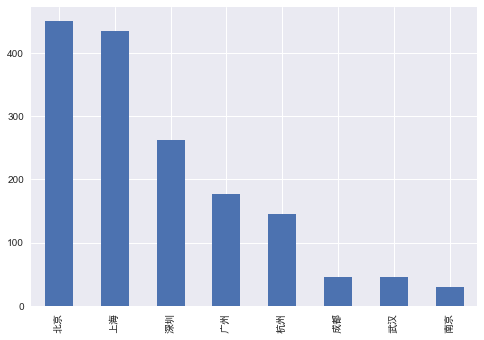

In [283]:
df.城市.value_counts().plot(kind='bar');

In [287]:
# 经常要绘制柱状图
def bar(column):
    """传入列名,绘制柱状图"""
    return df[column].value_counts().plot(kind='bar');

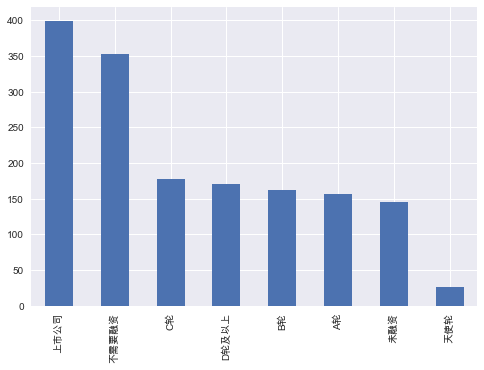

In [288]:
bar('融资阶段');

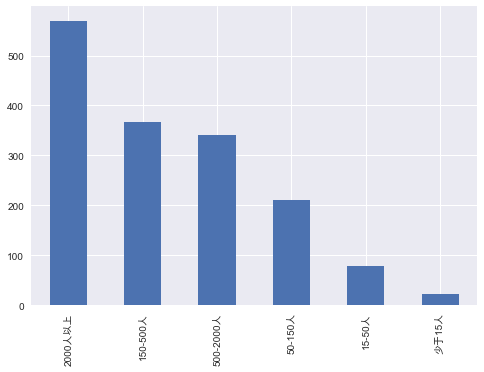

In [292]:
bar('公司规模')

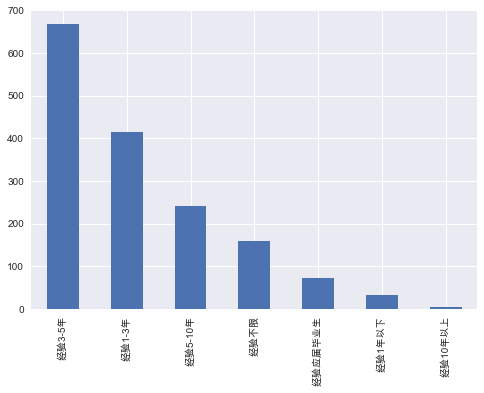

In [293]:
bar('经验要求')

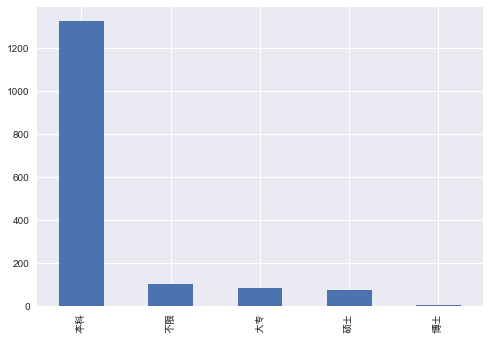

In [294]:
bar('学历')

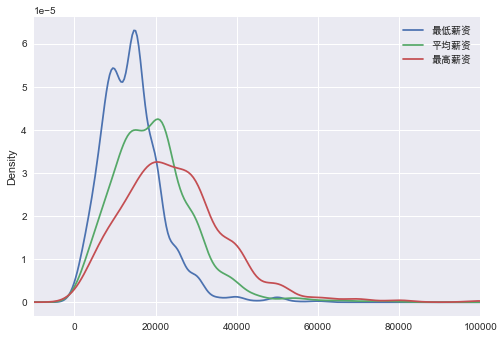

In [299]:
# 薪资的密度曲线/直方图
df[['最低薪资','平均薪资','最高薪资']].plot(kind='kde')
plt.xlim(-10000,100000);

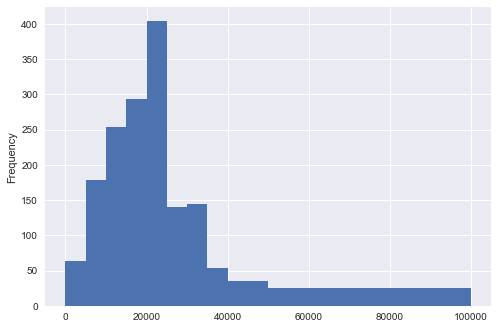

In [308]:
# 薪资的密度曲线/直方图
df['平均薪资'].plot(kind='hist',bins=[0,5000,10000,
            15000,20000,25000,30000,35000,40000,50000,100000])

### 分组统计

不同类别的薪资情况

In [311]:
df.groupby('城市').mean()

,最低薪资,最高薪资,平均薪资
城市,,,
上海,14206.896552,24850.574713,19528.735632
北京,16628.888889,28775.555556,22702.222222
南京,10533.333333,17066.666667,13800.000000
广州,11367.231638,19485.875706,15426.553672
成都,8586.956522,14869.565217,11728.260870
杭州,15227.586207,25213.793103,20220.689655
武汉,10044.444444,17533.333333,13788.888889
深圳,14622.137405,25412.213740,20017.175573


In [315]:
# 排序
df.groupby(by='城市').mean().sort_values(by ='平均薪资' ,ascending=False)

,最低薪资,最高薪资,平均薪资
城市,,,
北京,16628.888889,28775.555556,22702.222222
杭州,15227.586207,25213.793103,20220.689655
深圳,14622.137405,25412.213740,20017.175573
上海,14206.896552,24850.574713,19528.735632
广州,11367.231638,19485.875706,15426.553672
南京,10533.333333,17066.666667,13800.000000
武汉,10044.444444,17533.333333,13788.888889
成都,8586.956522,14869.565217,11728.260870


In [316]:
# 其他统计值
df.groupby('城市')['平均薪资'].agg(['max','min','median','mean'])

,max,min,median,mean
城市,,,,
上海,80000,1500,20000,19528.735632
北京,250000,3000,22500,22702.222222
南京,65000,4000,11500,13800.000000
广州,75000,1500,13500,15426.553672
成都,30000,2500,9250,11728.260870
杭州,70000,3000,20000,20220.689655
武汉,32500,4500,12500,13788.888889
深圳,65000,1000,20000,20017.175573


### 过滤出北京薪资超过20万的岗位

In [317]:
df[df.平均薪资 >= 200000]

,标题,城市,公司名称,公司地点,公司类型,融资阶段,公司规模,经验要求,学历,最低薪资,最高薪资,平均薪资,岗位技能,公司短评
1364,数据分析实习生,北京,好未来,中关村,教育,上市公司,2000人以上,经验不限,本科,200000,300000,250000,教育,上市公司 包晚餐 零食水果


In [320]:
df[df.平均薪资 > 50000]

,标题,城市,公司名称,公司地点,公司类型,融资阶段,公司规模,经验要求,学历,最低薪资,最高薪资,平均薪资,岗位技能,公司短评
151,数据分析专家,深圳,字节跳动,南山区,文娱丨内容,C轮,2000人以上,经验不限,本科,35000,70000,52500,数据分析,扁平管理，过亿用户，职业大牛
161,数据分析总监,深圳,深圳白骑士大数据有限公司,科技园,"企业服务,金融",A轮,50-150人,经验5-10年,硕士,38000,65000,51500,金融 算法 数据挖掘 数据分析,"平台好,创新型,发展迅速,股权期权"
166,资深数据分析师(J11772),深圳,货拉拉,上梅林,"移动互联网,消费生活",C轮,2000人以上,经验5-10年,本科,50000,70000,60000,BI 商业 数据分析,发展空间大
198,商业数据分析师,深圳,vivo,宝安区,硬件,未融资,2000人以上,经验3-5年,本科,50000,80000,65000,移动互联网,"股票期权,精英团队,弹性工作"
210,数据分析高级工程师,深圳,腾讯,前海,社交,上市公司,2000人以上,经验3-5年,本科,40000,70000,55000,数据分析 Hadoop Spark 数据挖掘,腾讯平台 福利待遇好 技术成长
212,商业数据分析师 (003969),深圳,vivo,宝安区,硬件,未融资,2000人以上,经验3-5年,本科,50000,80000,65000,移动互联网,"弹性工作,股票期权,大数据平台 千万用户"
418,数据分析专家,杭州,顾德智能,浦沿,"企业服务,金融",未融资,15-50人,经验5-10年,本科,55000,80000,67500,大数据 电商,互联网大厂
419,数据分析专家（营销分析）,杭州,瀚亚资本,浦沿,金融,不需要融资,2000人以上,经验5-10年,不限,50000,70000,60000,数据挖掘 数据仓库 数据分析 数据架构,薪酬和空间发展
451,商业数据分析总监,杭州,网易,长河,电商,上市公司,2000人以上,经验10年以上,本科,60000,80000,70000,电商 移动互联网 SQLServer Hive 数据分析 算法,跨境电商，薪酬有竞争力
516,数据分析总监 (MJ001218),广州,PPmoney互联网金融平台,珠江新城,金融,上市公司,500-2000人,经验5-10年,本科,50000,100000,75000,互联网金融 数据挖掘 数据架构 数据分析 数据处理,双休 弹性工作 餐补 五险一金


In [322]:
# 定义函数,分组统计
def group_salary(column):
    return df.groupby(column).mean().sort_values(by ='平均薪资' ,ascending=False)

In [323]:
group_salary('融资阶段')

,最低薪资,最高薪资,平均薪资
融资阶段,,,
D轮及以上,16274.853801,28304.093567,22289.473684
上市公司,16313.283208,28080.200501,22196.741855
C轮,15039.548023,26299.435028,20669.491525
B轮,14209.876543,25148.148148,19679.012346
天使轮,13576.923077,24500.000000,19038.461538
不需要融资,12983.002833,21892.351275,17437.677054
A轮,12369.426752,22140.127389,17254.777070
未融资,12020.689655,19951.724138,15986.206897


In [325]:
group_salary('公司类型').head(20)

,最低薪资,最高薪资,平均薪资
公司类型,,,
"旅游,文娱丨内容",42500.000000,65000.000000,53750.000000
"金融,不限",30000.000000,40000.000000,35000.000000
"金融,电商",20000.000000,40000.000000,30000.000000
"数据服务,广告营销",20833.333333,35000.000000,27916.666667
硬件,20230.769231,35435.897436,27833.333333
"金融,医疗丨健康",20000.000000,35000.000000,27500.000000
广告营销,19500.000000,33750.000000,26625.000000
教育,19870.967742,32612.903226,26241.935484
房产家居,19388.888889,33000.000000,26194.444444


In [326]:
# 规律很明显, 公司规模越小, 薪资平均越低
group_salary('公司规模')

,最低薪资,最高薪资,平均薪资
公司规模,,,
2000人以上,16659.649123,28798.245614,22728.947368
500-2000人,13705.882353,23682.352941,18694.117647
150-500人,13645.776567,23528.610354,18587.193460
50-150人,12933.649289,22426.540284,17680.094787
15-50人,9886.075949,16708.860759,13297.468354
少于15人,8826.086957,15347.826087,12086.956522


In [327]:
group_salary('经验要求')

,最低薪资,最高薪资,平均薪资
经验要求,,,
经验10年以上,40000.000000,60000.000000,50000.000000
经验5-10年,22618.257261,38261.410788,30439.834025
经验3-5年,15541.916168,27170.658683,21356.287425
经验不限,12000.000000,21063.291139,16531.645570
经验1-3年,10628.019324,18318.840580,14473.429952
经验1年以下,6312.500000,10062.500000,8187.500000
经验应届毕业生,5287.671233,9068.493151,7178.082192


In [329]:
df.经验要求.value_counts()

经验3-5年     668
经验1-3年     414
经验5-10年    241
经验不限       158
经验应届毕业生     73
经验1年以下      32
经验10年以上      4
Name: 经验要求, dtype: int64

In [330]:
group_salary('学历')

,最低薪资,最高薪资,平均薪资
学历,,,
博士,31500.000000,50000.000000,40750.000000
硕士,16054.054054,28581.081081,22317.567568
本科,14840.874811,25639.517345,20240.196078
不限,12215.686275,21137.254902,16676.470588
大专,8164.705882,13223.529412,10694.117647


In [321]:
df

,标题,城市,公司名称,公司地点,公司类型,融资阶段,公司规模,经验要求,学历,最低薪资,最高薪资,平均薪资,岗位技能,公司短评
0,高级数据分析（对标985/211）,武汉,易佰网络科技,白沙洲,"电商,移动互联网",B轮,2000人以上,经验1-3年,本科,8000,15000,11500,电商 算法 数据挖掘 数据分析 数据处理,五险一金/节日福利/专业培训/全勤奖
1,数据分析师,武汉,悦然心动,洪山区,"社交,游戏",上市公司,150-500人,经验不限,不限,10000,20000,15000,可视化 数据库 数据分析,带薪出国游；千万级用户
2,数据分析师,武汉,盛天网络,东湖新技术…,"游戏,文娱丨内容",上市公司,500-2000人,经验5-10年,本科,10000,15000,12500,数据分析 数据运营,福利好 发展快
3,数据分析师,武汉,字节跳动,洪山区,文娱丨内容,C轮,2000人以上,经验3-5年,本科,20000,40000,30000,数据分析,弹性工作，免费三餐，晋升空间，团队氛围好
4,数据分析,武汉,诸葛io,东湖新技术…,"企业服务,数据服务",A轮,50-150人,经验不限,大专,5000,10000,7500,大数据 企业服务 SQL,五险一金 带薪年假 定期团建
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,银行数据分析实习生,南京,江苏谷科软件有限公司,雨花台区,"信息安全,金融",未融资,150-500人,经验1年以下,本科,5000,7000,6000,Oracle 数据仓库 数据挖掘,六险一金、年终奖、一年两次调薪机会
1586,商业数据分析师,南京,讯实科技,宁南,数据服务,B轮,15-50人,经验3-5年,不限,10000,15000,12500,数据分析,五险一金 双休
1587,BI数据分析产品经理,南京,五星电器,鼓楼区,"电商,消费生活",不需要融资,2000人以上,经验5-10年,本科,10000,15000,12500,新零售 BI 数据 数据分析,五险一金、节假日福利
1588,大数据分析开发工程师,南京,南京邮数通,山西路,"移动互联网,信息安全",不需要融资,15-50人,经验1-3年,本科,8000,15000,11500,大数据 数据挖掘,"项目奖金,带薪休年假,五险一金"


## 使用pyecharts绘制地图

In [331]:
!pip install pyecharts -i https://pypi.tuna.tsinghua.edu.cn/simple 

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


### 绘制一个柱状图

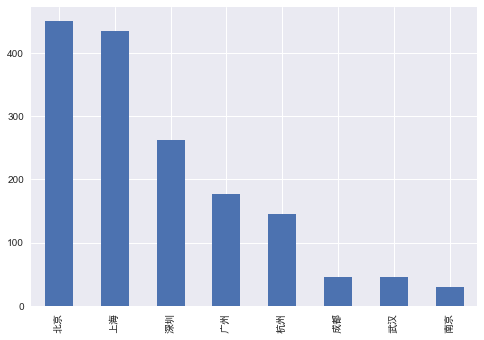

In [332]:
df.城市.value_counts().plot(kind='bar');

In [333]:
df.城市.value_counts()

北京    450
上海    435
深圳    262
广州    177
杭州    145
成都     46
武汉     45
南京     30
Name: 城市, dtype: int64

In [337]:
city_num = df.城市.value_counts()

In [338]:
city_num.index 

Index(['北京', '上海', '深圳', '广州', '杭州', '成都', '武汉', '南京'], dtype='object')

In [335]:
# 导包
import pyecharts
# 导入柱状图函数
from pyecharts.charts import Bar

这个软件和pandas,numpy不是一个生态系统, 所以数据类型兼容性不好

In [345]:
# 将数据都改成列表
# 实例化
bar = Bar()
# 添加数据
bar.add_xaxis( list(city_num.index) )
bar.add_yaxis('城市工作数量',list(city_num))
bar.render_notebook()

### 绘制地理图

In [346]:
!pip install echarts-countries-pypkg -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 2.0MB 1.3MB/s eta 0:00:01
  Created wheel for echarts-countries-pypkg: filename=echarts_countries_pypkg-0.1.6-cp37-none-any.whl size=2118071 sha256=45e410b113cb56d1419438e1605e38bc776d4403b57a596446adcaa1a15f4c25
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/75/df/65/db53ccc61ae84c12c77b929c88e8543ad2bbc389420506fa45
Successfully built echarts-countries-pypkg


In [347]:
!pip install echarts-china-provinces-pypkg -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 757kB 1.7MB/s eta 0:00:01
  Created wheel for echarts-china-provinces-pypkg: filename=echarts_china_provinces_pypkg-0.0.3-cp37-none-any.whl size=760427 sha256=b70c0c9569448a3c382b3de1fb473825ea48cf85a34b6718b6838ff6e493371d
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/62/ec/9a/7446a46579575828a92e011cc69353b6803dcabc14b9eac096
Successfully built echarts-china-provinces-pypkg


In [348]:
!pip install echarts-china-cities-pypkg -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 4.0MB 770kB/s eta 0:00:01     |█████████████████               | 2.1MB 625kB/s eta 0:00:03     |████████████████████████▏       | 3.0MB 625kB/s eta 0:00:02
  Created wheel for echarts-china-cities-pypkg: filename=echarts_china_cities_pypkg-0.0.9-cp37-none-any.whl size=4272294 sha256=544ff01a24e06b0ff72637e6fed97170623c41cf2c5ca29a8e75ac8a578e3697
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/da/7c/7f/b08f4b0f71909fcf5f0c7f8d639d84279d30c5263508239601
Successfully built echarts-china-cities-pypkg


In [349]:
!pip install echarts-china-counties-pypkg -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 4.4MB 709kB/s eta 0:00:01
  Created wheel for echarts-china-counties-pypkg: filename=echarts_china_counties_pypkg-0.0.2-cp37-none-any.whl size=6507433 sha256=bfa45b00252493cf175a7262483a97af5c7e96af5aaec4d3a8c674a987fd222f
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/52/f4/fa/ce93ffd78d03fa087daf1961f28f099510daf35782e87af60e
Successfully built echarts-china-counties-pypkg
  Found existing installation: lml 0.0.9
    Uninstalling lml-0.0.9:
      Successfully uninstalled lml-0.0.9


In [350]:
!pip install echarts-china-misc-pypkg -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 153kB 1.9MB/s eta 0:00:01
  Created wheel for echarts-china-misc-pypkg: filename=echarts_china_misc_pypkg-0.0.1-cp37-none-any.whl size=163617 sha256=29dcdf459b128a600491567ce9514137aed760f48b529929c5282dcc3269bcad
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/37/bb/02/bc6baccf5d8763615bc65ac3bd93b302e80ce1b0e1bbec1da5
Successfully built echarts-china-misc-pypkg


In [351]:
!pip install echarts-united-kingdom-pypkg -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 1.3MB 2.0MB/s eta 0:00:01   | 757kB 2.0MB/s eta 0:00:01
  Created wheel for echarts-united-kingdom-pypkg: filename=echarts_united_kingdom_pypkg-0.0.1-cp37-none-any.whl size=1410905 sha256=9f1518a0916c436820fe8c4e4ce904b3dde1fe169cc3e3778e25f318f43961b6
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/35/0f/f4/1050438cbb07472f9bae6097061554e6ecb3613d98f7acd5bc
Successfully built echarts-united-kingdom-pypkg


In [353]:
from pyecharts.charts import Geo

In [357]:
from pyecharts import options as opts # 配置

In [370]:
s = [('北京',250), ('武汉',120),('沈阳',180),('昆明',23),('呼和浩特',66)]

In [371]:
geo = Geo()
geo.add_schema(maptype='china') # 地图类型
geo.add('PM2.5',s) # 添加数据图例, 还有数据
geo.set_series_opts(label_opts=opts.LabelOpts(is_show=False)) # 把默认的维度标签隐藏掉
# 配置地图显示类型和标题
geo.set_global_opts(visualmap_opts=opts.VisualMapOpts(),title_opts=opts.TitleOpts(title="城市标记"))
geo.render_notebook() # jupyter中显示

In [372]:
city_num

北京    450
上海    435
深圳    262
广州    177
杭州    145
成都     46
武汉     45
南京     30
Name: 城市, dtype: int64

In [ ]:
# 首先需要将数据转换成需要的形式
s = [('北京',250), ('武汉',120),('沈阳',180),('昆明',23),('呼和浩特',66)]

In [373]:
# 将数据转换成字典
city_num.to_dict()

{'北京': 450,
 '上海': 435,
 '深圳': 262,
 '广州': 177,
 '杭州': 145,
 '成都': 46,
 '武汉': 45,
 '南京': 30}

In [376]:
# 转换出需要的形式
city_num.to_dict().items()

dict_items([('北京', 450), ('上海', 435), ('深圳', 262), ('广州', 177), ('杭州', 145), ('成都', 46), ('武汉', 45), ('南京', 30)])

In [ ]:
#  # 指定 visualMapPiecewise 组件的最小值。
#     min_: Union[int, float] = 0,

#     # 指定 visualMapPiecewise 组件的最大值。
#     max_: Union[int, float] = 100,

In [378]:
geo = Geo()
geo.add_schema(maptype='china') # 地图类型
geo.add('数据分析岗位数量',city_num.to_dict().items()) # 添加数据图例, 还有数据
geo.set_series_opts(label_opts=opts.LabelOpts(is_show=False)) # 把默认的维度标签隐藏掉
# 配置地图显示类型和标题
geo.set_global_opts(visualmap_opts=opts.VisualMapOpts(max_=500),title_opts=opts.TitleOpts(title="城市岗位分布图"))
geo.render_notebook() # jupyter中显示

In [379]:
geo = Geo()
geo.add_schema(maptype='china') # 地图类型
geo.add('数据分析岗位数量',city_num.to_dict().items()) # 添加数据图例, 还有数据
geo.set_series_opts(label_opts=opts.LabelOpts(is_show=False)) # 把默认的维度标签隐藏掉
# 配置地图显示类型和标题
geo.set_global_opts(visualmap_opts=opts.VisualMapOpts(max_=500),title_opts=opts.TitleOpts(title="城市岗位分布图"))
geo.render('城市工作数量分布图.html') # 保存到本地

'/Users/mac/FangCloudV2/个人文件/pythoncode/01.备课文件夹/08.数据清洗案例/04.20200516 - 0329期_数据清洗案例/城市工作数量分布图.html'